In [1]:
import pandas as pd

In [69]:
import os

In [70]:
from PIL import Image

In [ ]:
targets = []
healthy_images_names = os.listdir()

In [2]:
metadata_df = pd.read_csv("archive (1)\metadata.csv")
print(metadata_df.head(5))

   Unnamed: 0            image  class format mode          shape
0           0   Cancer (1).jpg  tumor   JPEG  RGB  (512, 512, 3)
1           1   Cancer (1).png  tumor    PNG    L     (300, 240)
2           2   Cancer (1).tif  tumor   TIFF  RGB  (256, 256, 3)
3           3  Cancer (10).jpg  tumor   JPEG  RGB  (512, 512, 3)
4           4  Cancer (10).tif  tumor   TIFF  RGB  (256, 256, 3)


In [20]:
metadata_df['mode'].unique()

array(['RGB', 'L', 'RGBA', 'P'], dtype=object)

In [22]:
metadata_df['mode'].isna().sum()

0

In [24]:
metadata_rgb_df = pd.read_csv("archive (1)\metadata_rgb_only.csv")
print(metadata_rgb_df.head(5))
print(len(metadata_rgb_df))

   Unnamed: 0             image  class format mode          shape
0           0    Cancer (1).jpg  tumor   JPEG  RGB  (512, 512, 3)
1           2    Cancer (1).tif  tumor   TIFF  RGB  (256, 256, 3)
2           3   Cancer (10).jpg  tumor   JPEG  RGB  (512, 512, 3)
3           4   Cancer (10).tif  tumor   TIFF  RGB  (256, 256, 3)
4           5  Cancer (100).jpg  tumor   JPEG  RGB  (512, 512, 3)
4461


In [23]:
metadata_rgb_df = metadata_df[metadata_df["mode"] == "RGB"]
print(metadata_rgb_df.head(5))
print(len(metadata_rgb_df))

   Unnamed: 0             image  class format mode          shape
0           0    Cancer (1).jpg  tumor   JPEG  RGB  (512, 512, 3)
2           2    Cancer (1).tif  tumor   TIFF  RGB  (256, 256, 3)
3           3   Cancer (10).jpg  tumor   JPEG  RGB  (512, 512, 3)
4           4   Cancer (10).tif  tumor   TIFF  RGB  (256, 256, 3)
5           5  Cancer (100).jpg  tumor   JPEG  RGB  (512, 512, 3)
4461


In [25]:
metadata_l_df = metadata_df[metadata_df["mode"] == "L"]
print(metadata_l_df.head(5))
print(len(metadata_l_df))

     Unnamed: 0              image  class format mode         shape
1             1     Cancer (1).png  tumor    PNG    L    (300, 240)
36           36  Cancer (1028).jpg  tumor   JPEG    L    (336, 300)
239         239  Cancer (1209).jpg  tumor   JPEG    L    (336, 300)
269         269  Cancer (1236).jpg  tumor   JPEG    L  (1024, 1024)
293         293  Cancer (1258).jpg  tumor   JPEG    L  (1427, 1275)
132


In [26]:
metadata_rgba_df = metadata_df[metadata_df["mode"] == "RGBA"]
print(metadata_rgba_df.head(5))
print(len(metadata_rgba_df))

      Unnamed: 0                  image   class format  mode          shape
4127        4127  Not Cancer  (574).jpg  normal    PNG  RGBA  (664, 550, 4)
4134        4134  Not Cancer  (580).jpg  normal    PNG  RGBA  (512, 512, 4)
4580        4580  Not Cancer  (981).jpg  normal    PNG  RGBA  (664, 550, 4)
4588        4588  Not Cancer  (989).jpg  normal    PNG  RGBA  (400, 393, 4)
4590        4590  Not Cancer  (990).jpg  normal    PNG  RGBA  (454, 442, 4)
5


In [27]:
metadata_p_df = metadata_df[metadata_df["mode"] == "P"]
print(metadata_p_df.head(5))
print(len(metadata_p_df))

      Unnamed: 0                  image   class format mode       shape
4129        4129  Not Cancer  (576).jpg  normal    PNG    P  (725, 728)
4581        4581  Not Cancer  (982).jpg  normal    PNG    P  (725, 728)
2


In [28]:
# 4461+132+5+2 == 4600

In [29]:
print(len(metadata_df))

4600


In [38]:
import numpy as np


In [41]:
import cv2

In [50]:
import matplotlib.pyplot as plt

In [44]:
images_list =[]
for ind, data in metadata_rgb_df.iterrows():
    # print(data['shape'])
    images_list.append(cv2.imread("archive (1)/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/"+data['image']))

In [49]:
print(images_list[0].shape)

(512, 512, 3)


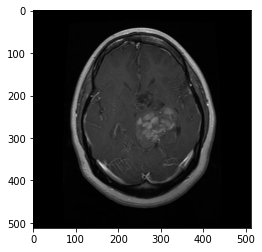

In [51]:
plt.figure()
plt.imshow(images_list[0])

In [52]:
image_0 = images_list[0]

In [53]:
image_0.reshape(256, 256, 3)

ValueError: cannot reshape array of size 786432 into shape (256,256,3)

In [55]:
images_arr = np.array(images_list)
print(images_arr.shape)

(4461,)


C:\Users\nirmi\AppData\Local\Temp/ipykernel_1676/3391958919.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images_arr = np.array(images_list)


In [58]:
print(images_arr[1].shape)

(256, 256, 3)


In [59]:
import torch

In [68]:
import torchvision

In [63]:
images_arr.dtype

dtype('O')

In [60]:
t = torch.from_numpy(images_arr)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [65]:
import torchvision.transforms as transforms

In [83]:
from torch.utils.data import DataLoader

In [109]:
from torchvision.utils import make_grid

In [95]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize(256), transforms.CenterCrop(256)])

In [64]:
# tensor_list = []
# for each_image in images_list:
#     tensor_list.append()

<class 'numpy.ndarray'>


In [96]:
dataset = torchvision.datasets.ImageFolder("archive (1)\Brain Tumor Data Set\Brain Tumor Data Set", transform=transform)

In [97]:
for image, label in dataset:
    pass

KeyboardInterrupt: 

0


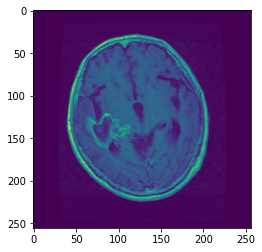

In [98]:
plt.figure()
plt.imshow(image[0])
print(label)

In [72]:
with Image.open("archive (1)\Brain Tumor Data Set\Brain Tumor Data Set\Brain Tumor\Cancer (1).jpg") as im:
    print(type(im))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [81]:
# 'dataset' ready

In [99]:
train_size = int(0.7*(len(dataset)))
test_size = int(0.3*(len(dataset)))
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

In [100]:
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=100)

In [101]:
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=10)

In [102]:
train_loader

In [105]:
for image, label in test_loader:
    break

In [106]:
image.shape

torch.Size([10, 3, 256, 256])

In [108]:
class_name = dataset.classes

Label: [1 0 1 0 1 1 1 1 0 1]
Class: Healthy Brain Tumor Healthy Brain Tumor Healthy Healthy Healthy Healthy Brain Tumor Healthy


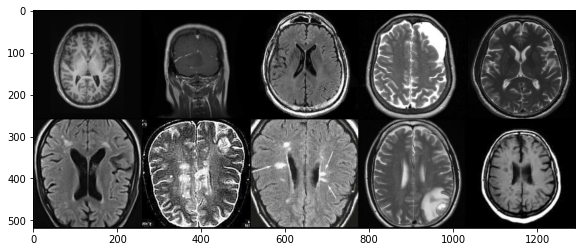

In [111]:
print('Label:', label.numpy())
print('Class:', *np.array([class_name[i] for i in label]))

im = make_grid(image, nrow=5)  # the default nrow is 8

# Inverse normalize the images
# inv_normalize = transforms.Normalize(
#     mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
#     std=[1/0.229, 1/0.224, 1/0.225]
# )
# im_inv = inv_normalize(im)

# Print the images
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im, (1, 2, 0)))